# The Goal

Lyft wants to create some kind of semantic segmentation network - my idea is to have a GAN generate it. Let's see how that works.


## Looking at the data
The dataset provided has some examples - let's take a look. I'll also try and create a function to make the resulting segmented map look more visibly striking.

In [2]:
#First, load up things we're definitely going to need
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Load up datasets
from glob import glob

dataset = {
    "images": [],
    "maps": []
}

def get_filenames(folder):
    return glob(folder + "/*.png")

dataset['images'] = get_filenames("./data/Train/CameraRGB/")
dataset['maps'] = get_filenames("./data/Train/CameraSeg/")

print("There are {} total camera shots, and {} total maps.".format(len(dataset['images']), len(dataset['maps'])))

There are 1000 total camera shots, and 1000 total maps.


In [51]:
#Make a map more colorful
def convertToColor(value):
    colors = [
        (255, 255, 255),   #0
        (255, 0, 0),      #1
        (0, 255, 0),      #2
        (0, 0, 255),      #3
        (255, 255, 0),    #4
        (127, 0, 255),    #5
        (51, 255, 51),    #6
        (255, 0, 127),    #7
        (127, 127, 127),  #8
        (0, 0, 0),        #9
        (0, 255, 255),  #10
        (0, 0, 100),      #11
        (100, 0, 0),      #12
    ]
    return colors[value[0]]

def colorizeMap(img):
    return [list( map(convertToColor, row) ) for row in img]
    
    

Using images 918, 25, and 330


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



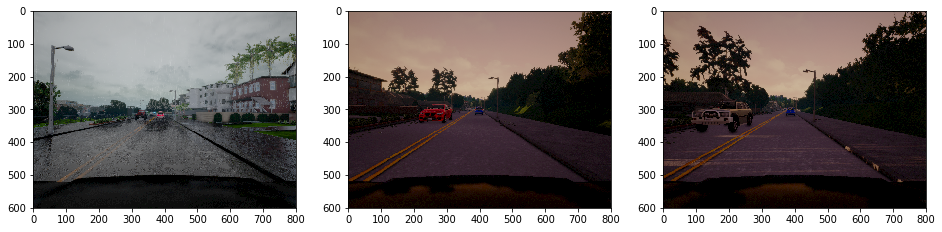

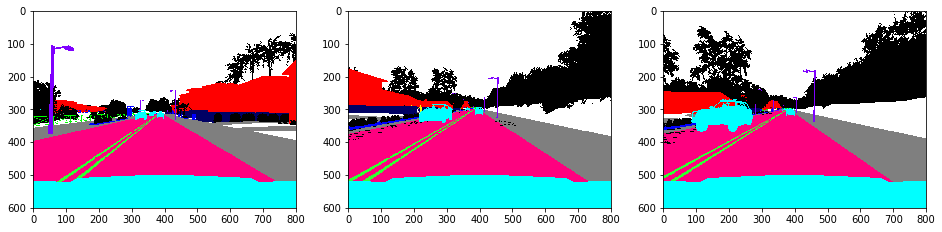

In [58]:
### Load up a couple of random examples of each
from random import randint

chosenImages = []

for i in range(0,3):
    chosenImages.append(randint(0, len(dataset['images'])))
    
print("Using images {}, {}, and {}".format(chosenImages[0], chosenImages[1], chosenImages[2]))

fig = plt.figure(figsize=(16,12))
for i in range(0, 3):
    fig.add_subplot(1, 3,i + 1)
    img = cv2.imread(dataset['images'][chosenImages[i]])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
fig = plt.figure(figsize=(16,12))
for i in range(0, 3):
    fig.add_subplot(1, 3,i + 1)
    img = cv2.imread(dataset['maps'][chosenImages[i]])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = colorizeMap(img)
    print(img)
    plt.imshow(img)